In [1]:
import pandas as pd

In [2]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/used_mobile_phone.csv'

In [3]:
df = pd.read_csv(filepath)
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [5]:
# 년,월,일로 새로운 피처 생성
df['year'] = df['create_date'].apply(lambda x: x[:4])
df['month'] = df['create_date'].apply(lambda x: x[5:7])
df['day'] = df['create_date'].apply(lambda x: x[8:10])

In [6]:
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25


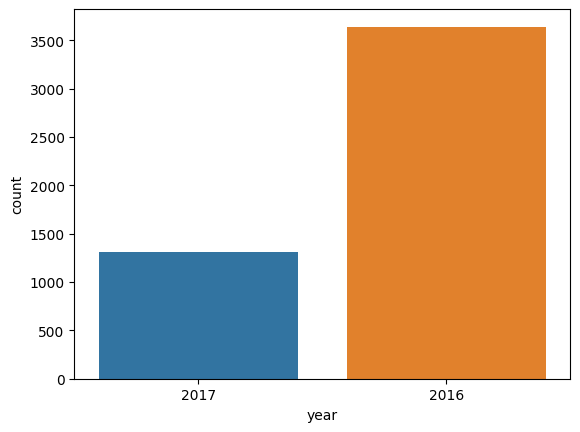

In [7]:
# 년도별 거래량 시각화
import seaborn as sns
import matplotlib.pyplot as plt
df['year'].value_counts()
sns.countplot(df, x='year')
# plt.bar(df['year'].value_counts())
# sns.countplot( df['year'].value_counts())
plt.show()

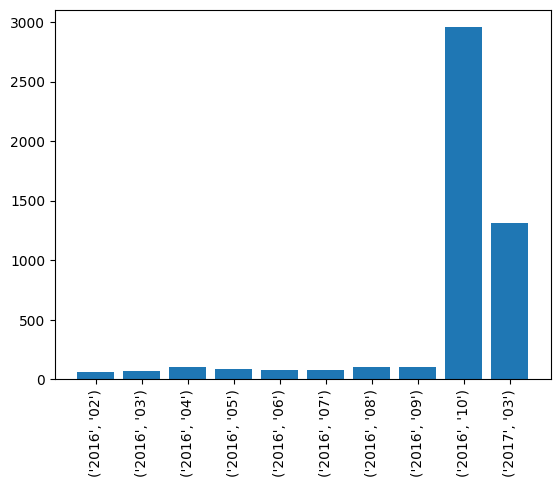

In [8]:
# 연도별 월별
new_df = df.groupby(['year','month'])['month'].count()
new_df.index, new_df.values
plt.bar(range(len(new_df.index)), new_df.values)
plt.xticks(range(len(new_df.index)), new_df.index, rotation=90)
plt.show()

<Axes: >

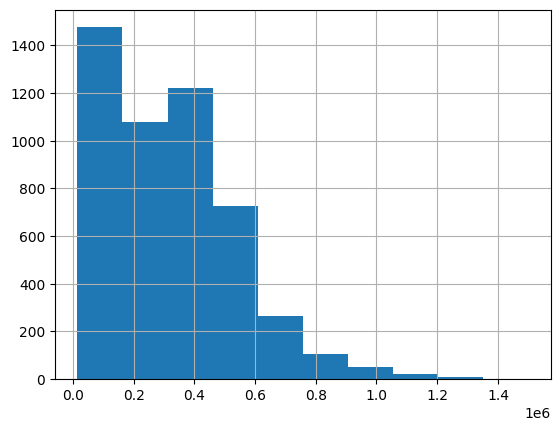

In [9]:
# 가격 피처 탐색
df['price'].hist()

In [10]:

#핸드폰 기종별 평균과 표준편차
  # 기종별 표준편차는 시장에서의 가격 변동성 및 시장동향
  # 적정한 가격 책정
  # 고객 인사이트 확보
import numpy as np
df_price_mean = df.groupby('phone_model')['price'].transform(lambda x: np.mean(x))
df_price_std = df.groupby('phone_model')['price'].transform(lambda x: np.std(x))

<Axes: >

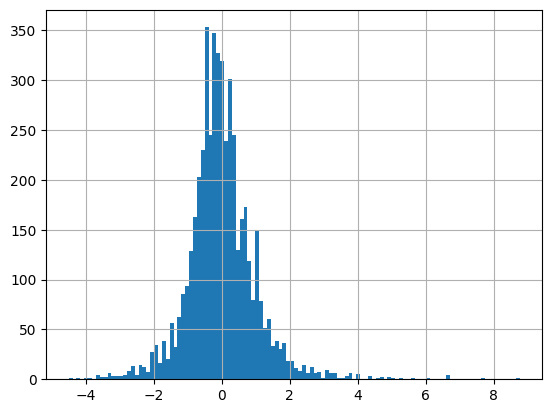

In [11]:
# z-score : 통계학에서 특정 데이터가 평균과 떨어진 정도 - 데이터내에서 어떤위치에 있는지 나타내는데 사용
#  (X - 평균) / 표준편차
# 해당 가격이 기종별 평균에 비해 어느정도로 높거나 낮은지를 알수있음
df_price_moel_z_score = (df['price']-df_price_mean) / df_price_std
df_price_moel_z_score.hist(bins='auto')

<Axes: >

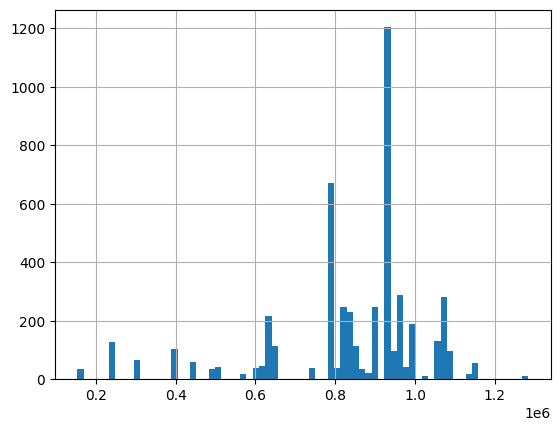

In [12]:
# 출고가 피처 탐색
df['factory_price'].hist(bins='auto')

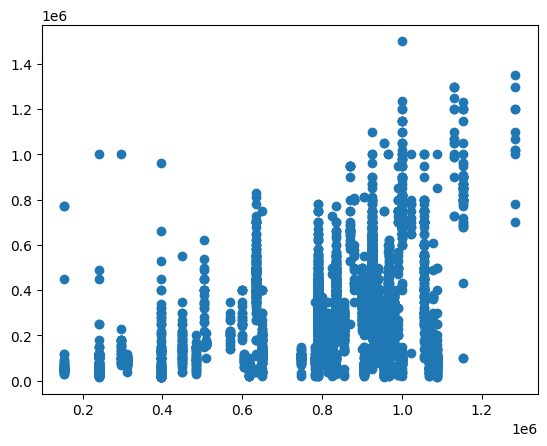

In [13]:
# 출고가와 중고거래가격의 상관관계
plt.scatter(df['factory_price'], df['price'])
plt.show()

In [14]:
# 핸드폰의 모델 탐색
model_counts = df['phone_model'].value_counts()
model_counts.describe()

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64

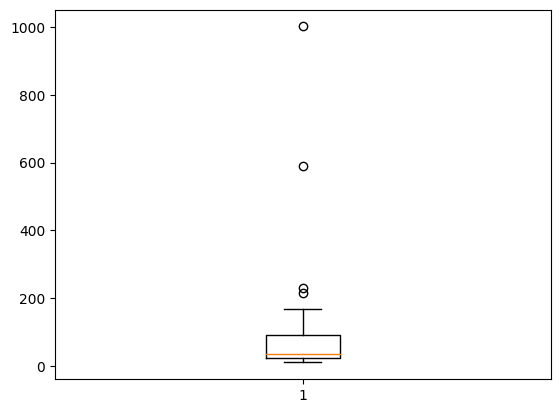

In [15]:
plt.boxplot(model_counts)
plt.show()

In [16]:
# Random Forest를 이용한 가격 예측
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017,03,23
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016,04,11


In [17]:
from sklearn.model_selection import train_test_split
# 사전형태의 데이터를 벡터화 - 모델에 사용가능 범주형 데이터를 수치형으로 변환
from sklearn.feature_extraction import DictVectorizer

In [18]:
data = [
    {'color':'red', 'size':'small'},
    {'color':'green', 'size':'medium'},
    {'color':'blue', 'size':'large'}
]
v = DictVectorizer()
v.fit_transform(data)

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [20]:
df2 = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'year', 'month']]
df2 = pd.get_dummies(df2)
x = df2.iloc[:, 1:]
y = df2.iloc[:,0]
x.shape, y.shape

((4951, 85), (4951,))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [22]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [23]:
x_train_predict = forest.predict(x_train)
x_test_predict = forest.predict(x_test)

In [24]:
np.sqrt(mean_squared_error(y_train, x_train_predict)), np.sqrt(mean_squared_error(y_test, x_test_predict))

(107001.40169220476, 110698.4221716859)

In [25]:
r2_score(y_train, x_train_predict), r2_score(y_test, x_test_predict)

(0.7527934637280007, 0.7488776302680882)

[('factory_price', 0.3800273588843789),
 ('maker_apple', 0.28197544837376426),
 ('phone_model_iphone se 64gb', 0.025172212039347382),
 ('phone_model_galaxy s7 edge 32gb', 0.019918408421107665),
 ('phone_model_iphone 6 128gb', 0.019675901928346215),
 ('phone_model_galaxy s4 32gb', 0.019665139142860586),
 ('price_index', 0.019403607499578517),
 ('phone_model_iphone 6 64gb', 0.017480479063145114),
 ('phone_model_galaxy s3 3g 8gb', 0.016810647560333243),
 ('maker_samsung', 0.015388201310943275)]

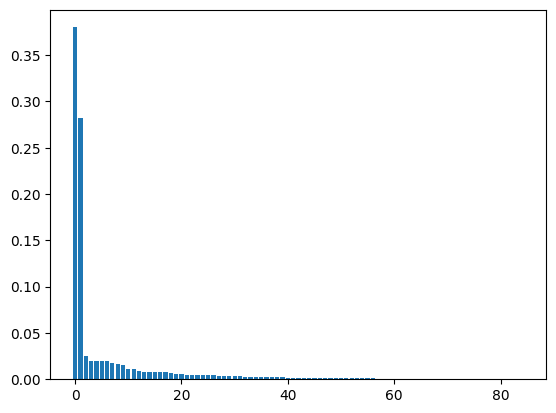

In [26]:
# 피처 중요도 분석
# 학습모델의 피처 중요도를 시각화
importance = forest.feature_importances_
indexs = np.argsort(importance)[::-1]
plt.bar(range(x.shape[1]), importance[indexs])

# 피처명을 출력
feat_labels = x.columns.tolist()
feature = list(zip(feat_labels, importance))
sorted(feature, key=lambda x: x[1], reverse=True)[:10]

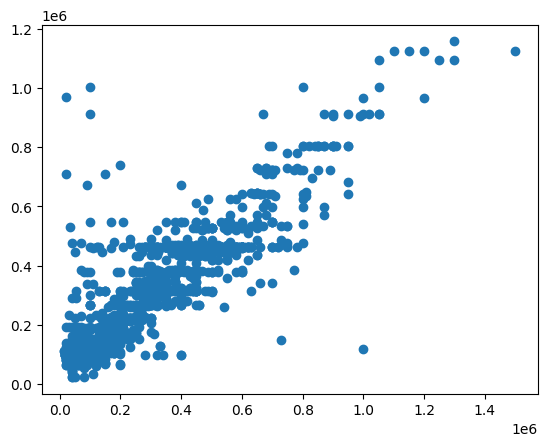

In [27]:
# 예측결과 scatter plot
plt.scatter(y_test, x_test_predict)

개선

In [28]:
# 얼마나 오래되었는지에 대한 점수화/수치화
from datetime import datetime
import time

In [29]:
def date_to_unixtime(strDate):
  return time.mktime(datetime.strptime(strDate, '%Y-%m-%d').timetuple())

In [30]:
df['create_unixtime'] = df['create_date'].apply(lambda x: date_to_unixtime(x[:10]))

In [31]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day,create_unixtime
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19,1.489882e+09
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26,1.477440e+09
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25,1.477354e+09
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017,03,23,1.490227e+09
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016,04,11,1.460333e+09


In [32]:
df['phone_model'].value_counts().index

Index(['iphone 6 64gb', 'iphone 6 16gb', 'galaxy note3 32gb', 'iphone se 64gb',
       'galaxy note5 32gb', 'iphone 5s 16gb', 'wine smart jazz 4gb',
       'lg g5 32gb', 'galaxy s6 32gb', 'galaxy s7 32gb', 'galaxy s4 32gb',
       'iphone 6 128gb', 'galaxy s7 edge 32gb', 'lg u 32gb',
       'galaxy note 2 32gb', 'g4 32gb', 'iphone 7 128gb', 'galaxy s3 3g 8gb',
       'g3 cat.6 32gb', 'galaxy s6 64gb', 'galaxy note4 32gb',
       'iphone 7 plus 128gb', 'galaxy note5 64gb', 'optimus g 32gb',
       'lg g2 32gb', 'galaxy note7 64gb', 'galaxy s6 edge 32gb',
       'galaxy a8 2016 32gb', 'galaxy alpha 32gb', 'iphone 5 16gb',
       'galaxy grand max 16gb', 'g pro2 32gb', 'y6 8gb', 'vega iron2 32gb',
       'galaxy s6 edge plus 32gb', 'iphone 7 32gb', 'galaxy note3 neo 16gb',
       'iphone 5s 32gb', 'galaxy folder 8gb', 'iphone 6s Plus 64gb',
       'luna 16gb', 'galaxy s5 32gb', 'galaxy s6 edge 64gb',
       'galaxy s7 edge 64gb', 'im-100 32gb', 'iphone se 16gb',
       'galaxy note3 16gb'

In [33]:
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x.split()[-1])
df['phone_model_detail'] = df['phone_model'].apply(lambda x: ' '.join(x.split()[:-1]))
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day,create_unixtime,phone_model_storage,phone_model_detail
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19,1.489882e+09,64gb,iphone 6
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26,1.477440e+09,32gb,galaxy s6 edge
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25,1.477354e+09,32gb,galaxy s6
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017,03,23,1.490227e+09,32gb,lg g5
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016,04,11,1.460333e+09,32gb,lg u


In [34]:
# phone_model_detail 별 거래현황 boxplot
df['phone_model_detail'].value_counts()

iphone 6               1707
galaxy note3            255
galaxy note5            241
iphone se               240
galaxy s6               183
iphone 5s               182
iphone 7                138
wine smart jazz         128
galaxy s7               128
galaxy s7 edge          123
lg g5                   121
galaxy s4               104
lg u                     96
galaxy note 2            95
g4                       95
iphone 7 plus            79
galaxy s3 3g             73
g3 cat.6                 72
galaxy s6 edge           67
galaxy note4             61
optimus g                50
lg g2                    45
iphone 6s Plus           42
galaxy note7             41
galaxy a8 2016           40
galaxy alpha             38
xperia z3                37
iphone 5                 36
galaxy grand max         35
g pro2                   35
nexus 5x                 35
y6                       35
vega iron2               34
galaxy s6 edge plus      33
galaxy note3 neo         31
galaxy folder       

{'whiskers': [<matplotlib.lines.Line2D at 0x7bc57e1d7070>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc57e1d5b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bc57e1d53f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc57e1d5db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc57e1d6590>],
 'means': []}

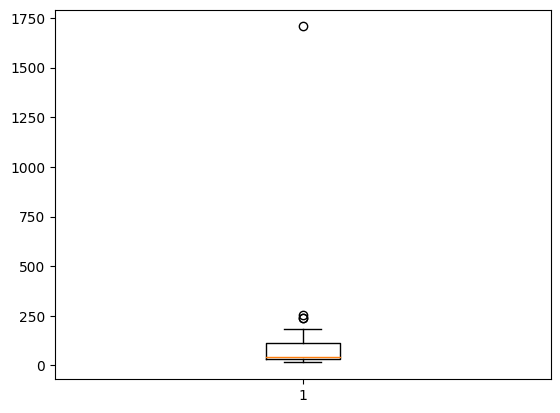

In [35]:
plt.boxplot(df['phone_model_detail'].value_counts())

-1.3966616903783375 1.666982156397844


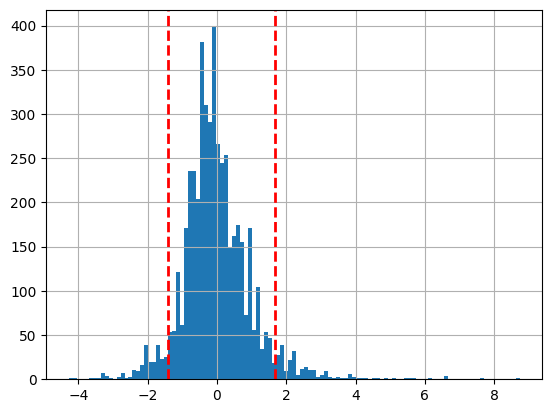

In [36]:
# 텍스트분석(감성)
# z-score를 이용해서 평균에 얼마나 떨어져있는지를 점수화
df['price_by_group'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x - x.mean()) / x.std())
# z-score를 그래프로 그려본다
ax = df['price_by_group'].hist(bins='auto')
# z-score를 기준으로 상, 하위 5%에 해당하는 점수를 lower_bound, upper_bound 지정
lower_b = df['price_by_group'].quantile(0.05)
upper_b = df['price_by_group'].quantile(0.95)

ax.axvline(x = lower_b, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x = upper_b, color='r', linestyle='dashed', linewidth=2)

print(lower_b, upper_b)

In [37]:
def get_price_level(price, lower, upper):
  if price >= upper:
    return '2'
  elif price >= lower:
    return '1'
  else:
    return '0'

In [38]:
df['price_lower'] = df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.05))
df['price_upper'] = df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.95))
df['price_level'] = df.apply(lambda x: get_price_level(x['price'], x['price_lower'], x['price_upper']), axis=1)

In [39]:
df[['price', 'price_lower', 'price_upper', 'price_level', 'text']].head()

,price,price_lower,price_upper,price_level,text
0,550000.0,180000.0,680000.0,1,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...
1,380000.0,180000.0,414000.0,1,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2,300000.0,150000.0,349000.0,1,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...
3,290000.0,100000.0,500000.0,1,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...
4,280000.0,18000.0,400000.0,1,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...


In [41]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 24.4 MB/s eta 0:00:00


In [42]:
from konlpy.tag import Okt

In [43]:
import string
def get_pos(x):
  okt = Okt()
  poses = okt.pos(x)
  return [pos[0] for pos in poses if pos[0] not in string.punctuation]

In [ ]:
corpus = sum(df['text'].apply(lambda x: get_pos(x)).tolist(), [])

KeyboardInterrupt: ignored

In [ ]:
from collections import Counter
counter = Counter(corpus)
common_words = counter.most_common(10)
common_words

In [ ]:
df['price_level'].value_counts()

In [ ]:
# TF-IDF 벡터
# TF(단어빈도): 문서에서 특정단어가 나타내는 빈도
# IDF: 특정단어의 문서 전체집합에서 빈도와 관련시킴
from pandas.core.common import random_state
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# 가장 많이 등장한 형태소를 제외한 모든 형태소를 제거하는 함수
def get_common_pos(x):
  okt = Okt()
  poses = okt.pos(x)
  return [pos[0]  for pos in  poses if pos[0] in common_words]

# price 기준으로 랜덤샘플링 1:3:1
negative_random =  df[df['price_level'] == '0'].sample(321,random_state=42)
normal_random =  df[df['price_level'] == '1'].sample(321*3,random_state=42)
positive_random =  df[df['price_level'] == '2'].sample(321,random_state=42)

# 샘플링해서 추출한 데이터를 합친다
df_sample = negative_random.append(normal_random).append(positive_random)

# TF-IDF를 수행
index_vectorizer =  CountVectorizer(tokenizer=lambda x : get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample['text'].tolist())
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

# 감성분류위한 학습 데이터셋을 정의
y = df_sample['price_level']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)
print(x_train.shape, x_test.shape)